In [902]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import Dense, BatchNormalization
import sklearn


In [903]:
# Hyperparameters
n_hidden_layers = 2 # Number of hidden layers.
n_units = 200 # Number of neurons of the hidden layers.
n_batch = 64 # Number of observations used per gradient update.
n_epochs = 10


In [904]:
# Create DataFrame (df) for calls
call_df = pd.read_csv("C:\\Users\\admin\\Desktop\\diogoFlorido\\SPX_Options_ANN-master_v2\\SPX_Options_ANN-master\\MLP3\\call_df.csv")
#call_df = tf.keras.utils.normalize(call_df, axis=-1, order=2)
call_df.head()

,strike,Time_to_Maturity,Option_Average_Price,RF_Rate,Sigma_20_Days_Annualized,Underlying_Price
0,500.0,0.046575,2395.90,2.0,0.074255,2896.72
1,600.0,0.046575,2296.00,2.0,0.074255,2896.72
2,700.0,0.046575,2196.10,2.0,0.074255,2896.72
3,800.0,0.046575,2096.20,2.0,0.074255,2896.72
4,900.0,0.046575,1996.35,2.0,0.074255,2896.72


In [905]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186469 entries, 0 to 186468
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   strike                    186469 non-null  float64
 1   Time_to_Maturity          186469 non-null  float64
 2   Option_Average_Price      186469 non-null  float64
 3   RF_Rate                   186469 non-null  float64
 4   Sigma_20_Days_Annualized  186469 non-null  float64
 5   Underlying_Price          186469 non-null  float64
dtypes: float64(6)
memory usage: 8.5 MB


In [906]:
call_df.columns

Index(['strike', 'Time_to_Maturity', 'Option_Average_Price', 'RF_Rate',
       'Sigma_20_Days_Annualized', 'Underlying_Price'],
      dtype='object')

In [907]:
call_df.corr()

,strike,Time_to_Maturity,Option_Average_Price,RF_Rate,Sigma_20_Days_Annualized,Underlying_Price
strike,1.000000,-0.169193,-0.958082,-0.047483,0.106553,-0.005203
Time_to_Maturity,-0.169193,1.000000,0.274003,0.044417,-0.171756,0.014459
Option_Average_Price,-0.958082,0.274003,1.000000,0.052933,-0.135429,0.046256
RF_Rate,-0.047483,0.044417,0.052933,1.000000,-0.489625,0.111525
Sigma_20_Days_Annualized,0.106553,-0.171756,-0.135429,-0.489625,1.000000,-0.228665
Underlying_Price,-0.005203,0.014459,0.046256,0.111525,-0.228665,1.000000


<AxesSubplot:>

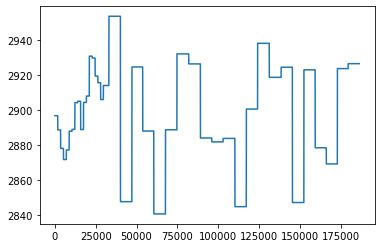

In [923]:
call_df.iloc[:,5].plot()

In [909]:
call_df1=call_df.drop(labels=range(0, 150000), axis=0)
call_df1=call_df1.dropna()

<AxesSubplot:>

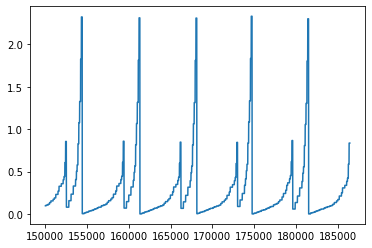

In [910]:
call_df1.iloc[:,1].plot()

In [924]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
call_df1 = sc.fit_transform(call_df1)
call_df2 = pd.DataFrame(call_df1, columns = ['strike', 'Time_to_Maturity', 'Option_Average_Price', 'RF_Rate',
       'Sigma_20_Days_Annualized', 'Underlying_Price'])
call_df2.head()

,strike,Time_to_Maturity,Option_Average_Price,RF_Rate,Sigma_20_Days_Annualized,Underlying_Price
0,0.464454,-0.438263,-0.729818,0.573748,0.780211,-1.889919
1,0.473464,-0.438263,-0.735928,0.573748,0.780211,-1.889919
2,0.482473,-0.438263,-0.741816,0.573748,0.780211,-1.889919
3,0.491483,-0.438263,-0.747704,0.573748,0.780211,-1.889919
4,0.500492,-0.438263,-0.753370,0.573748,0.780211,-1.889919


In [925]:
call_df2=call_df2.dropna()

In [926]:

# Split call_df into random train and test subsets, for inputs (X) and output (y)
# Split call_df into random train and test subsets, for inputs (X) and output (y)
call_X_train, call_X_test, call_y_train, call_y_test = (train_test_split(
    call_df2.drop(["Option_Average_Price"], axis = 1), 
    call_df2.Option_Average_Price, test_size = 0.1))

In [942]:
call_y_test

28801    0.660893
651      2.838169
20725   -0.836693
36165   -0.774812
20156   -0.830582
           ...   
8951    -0.555284
28365    0.608566
34301   -0.833693
24221   -0.719930
16552    1.255483
Name: Option_Average_Price, Length: 3647, dtype: float64

In [928]:
#call_X_train.info()

In [929]:
#call_X_train.describe()

In [930]:
#call_X_train = tf.keras.utils.normalize(call_X_train, axis=1)
#call_y_train = tf.keras.utils.normalize(call_y_train)
#call_X_test = tf.keras.utils.normalize(call_X_test, axis=1)
#call_y_test = tf.keras.utils.normalize(call_y_test)
# Create model using Keras' Functional API
# Create input layer
inputs = keras.Input(shape = (call_X_train.shape[1],))

In [931]:
x = layers.LeakyReLU(alpha = 1)(inputs)


In [932]:

def melu(z):
     return tf.where(z > 0, ((z**2)/2 + 0.02*z) / (z - 2 + 1/0.49), 
                      0.49*(tf.keras.activations.exponential(z)-1))
   
#def melu(z):
#     return tf.cond(z > 0, lambda: ((z**2)/2 + 0.02*z) / (z - 2 + 1/0.49), 
#                      lambda: 0.49*(tf.keras.activations.exponential(z)-1))
  

In [933]:
def hl(tensor):
    # Create custom MELU activation function
    
    
    
    # from keras.utils.generic_utils import get_custom_objects
    # get_custom_objects().update({'melu': layers.Activation(melu)})
    
    # @tf.function
    # def melu(z):
    #     if z > 0:
    #         return ((z**2)/2 + 0.02*z) / (z - 2 + 1/0.49)
    #     else:
    #         return 0.49*(keras.activations.exponential(z)-1)
    initializer = tf.keras.initializers.GlorotUniform()
     
    y = layers.Dense(n_units, activation = melu, kernel_initializer=initializer)(tensor)
    #y.numpy()
    """
    Dense() creates a densely-connected NN layer, implementing the following 
    operation: output = activation(dot_product(input, kernel) + bias) where 
    activation is the element-wise activation function passed as the activation
    argument, kernel is a weights matrix created by the layer, and bias is a 
    bias vector created by the layer (only applicable if use_bias is True, 
    which it is by default). In this case we use the MELU activation function.
    """
    # x = layers.Dense(n_units)(tensor)
    # y = layers.Activation(melu)(x)
    return y


In [934]:
# # hl function that works. Useful for tests.
# def hl(tensor):
#     lr = layers.Dense(n_units, activation = layers.LeakyReLU())(tensor)
#     return lr

# Create hidden layers
for _ in range(n_hidden_layers):
    x = hl(x)

In [935]:
#x = hl(x)


# Create output layer
outputs = layers.Dense(1, activation = keras.activations.softplus)(x)

In [936]:

# Actually create the model
model = keras.Model(inputs = inputs, outputs = outputs)


In [937]:

"""
Penalization function used in both the Custom loss funcion and the metric for 
arbitrage-free prices
"""
def pen(x, lamb, m):
    return tf.where(x < 0, 0.0, lamb * x**m)


In [938]:
# Custom loss function that is a MSE function plus three soft constraints
def constrained_mse(y_true, y_pred):
    
    # Parameters of penalization function
    lamb = 10
    m = 4
    
    # # Penalization function
    # # Parameters of said function
    # lamb = 10
    # m = 4
    
    # # Function
    # def pen(x):
    #     return tf.where(x < 0, 0.0, lamb * x**m)
    # def pen(x):
    #     return tf.cond(x < 0, lambda: 0.0, lambda: lamb * x**m)
    
    # Custom loss function
    return (keras.backend.mean(keras.backend.square(y_pred - y_true)) # MSE
            
            + pen(-(model.input[:,0])**2 * tf.gradients(tf.gradients(y_pred, 
                    model.input), model.input)[0][:, 0], lamb, m) # constraint 1
            
            + pen(-model.input[:,1] * tf.gradients(y_pred, 
                    model.input)[0][:, 1], lamb, m) # constraint 2

            + pen(model.input[:,0] * tf.gradients(y_pred, 
                    model.input)[0][:, 0], lamb, m)) # constraint 3



In [939]:
# Measure/Metric for the amount of prices that are not arbitrage-free.
def measure_arbitrage(y_true, y_pred):
    
    # Parameters of penalization function
    lamb = 1
    m = 0
    
    # # Function
    # def pen(x):
    #     return tf.cond(x < 0, lambda: 0.0, lambda: lamb * x**m)
    
    return (pen(-(model.input[:,0])**2 * tf.gradients(tf.gradients(y_pred, 
                    model.input), model.input)[0][:, 0], lamb, m) # constraint 1
            
            + pen(-model.input[:,1] * tf.gradients(y_pred, 
                    model.input)[0][:, 1], lamb, m) # constraint 2

            + pen(model.input[:,0] * tf.gradients(y_pred, 
                    model.input)[0][:, 0], lamb, m)) # constraint 3




In [941]:



# QUICK TEST
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001, clipvalue=0.5))
#model.compile(loss = constrained_mse, optimizer = keras.optimizers.Adam())
#model.compile(loss = constrained_mse, optimizer = keras.optimizers.Adam(), 
#                metrics = [measure_arbitrage])

history = model.fit(call_X_train, call_y_train, 
                    batch_size = 64, epochs = 15,verbose = 1)
#model.save('Saved_models/mlp3_call_test')


Train on 32822 samples
Epoch 1/15
32822/32822 [==============================] - 2s 50us/sample - loss: nan
Epoch 2/15
32822/32822 [==============================] - 1s 31us/sample - loss: nan
Epoch 3/15
32822/32822 [==============================] - 1s 28us/sample - loss: nan
Epoch 4/15
27648/32822 [========================>.....] - ETA: 0s - loss: na

limit_output extension: Maximum message size of 10000 exceeded with 10076 characters

In [897]:
train_loss = history.history["loss"]
#validation_loss = history.history["val_loss"]
numpy__train_loss = np.array(train_loss)
#numpy_validation_loss = np.array(validation_loss)
#np.savetxt("Saved_models/mlp3_call_test_train_losses.txt", 
 #           numpy__train_loss, delimiter=",")
#np.savetxt("Saved_models/mlp3_call_test_validation_losses.txt", 
 #           numpy_validation_loss, delimiter=",")



In [898]:
train_loss

[0.021221725585568025,
 0.01968878185025016,
 0.01804048754842344,
 0.01613930085641354,
 0.013979789162959591,
 0.011630569900651115,
 0.009232134018966161,
 0.007021585489735556,
 0.005263390830860934,
 0.00410549653330891,
 0.003493641423010188,
 0.0032433288886340238,
 nan,
 nan,
 nan]